origial data modeling belings to :https://www.linkedin.com/in/darshan-patil-89557a1ab

#Predicting heart disease using machine learning


### Preparing all tools required


In [ ]:
# Regular Exploratory Data Analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import RocCurveDisplay


In [ ]:
df = pd.read_csv("heart-disease.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
import sklearn

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

<Axes: xlabel='target'>

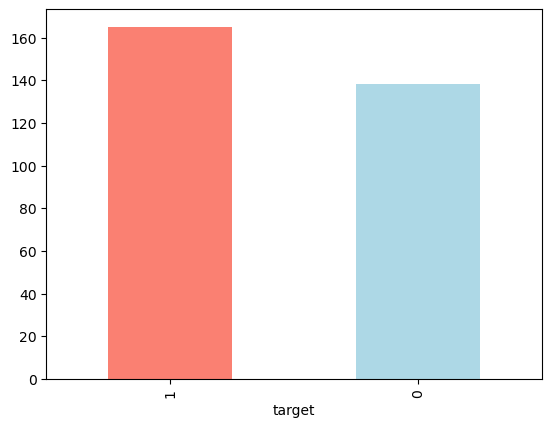

In [ ]:
df['target'].value_counts().plot(kind='bar',color=['salmon','lightblue'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# do we have any null values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Finding patterns in our data

In [ ]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
# comparing columns to each other
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


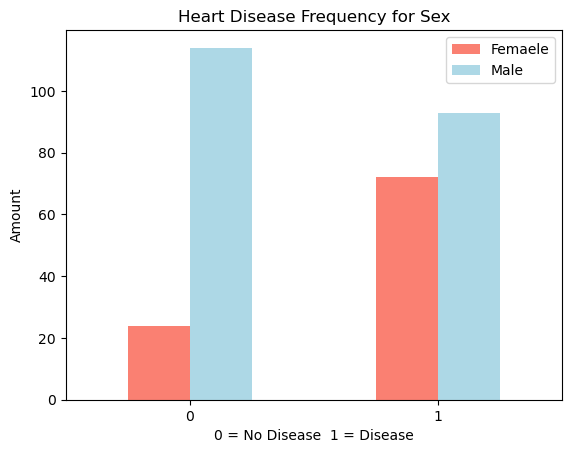

In [ ]:
pd.crosstab(df.target,df.sex).plot(kind='bar',color=['salmon','lightblue'])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel('0 = No Disease  1 = Disease')
plt.ylabel("Amount")
plt.legend(["Femaele","Male"])
plt.xticks(rotation=0);

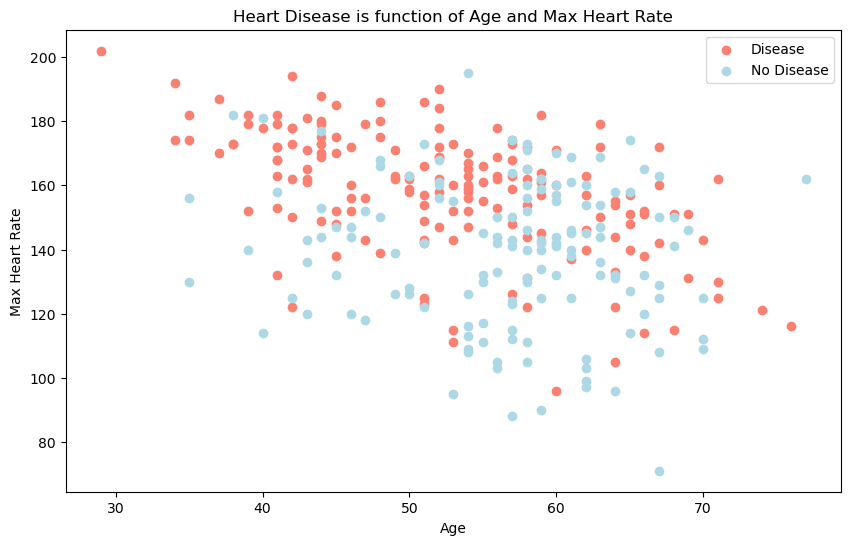

In [ ]:
plt.figure(figsize=(10,6))
# scattering with positive examples
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c='salmon')
# scattering with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c='lightblue');
plt.title("Heart Disease is function of Age and Max Heart Rate")
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(["Disease",'No Disease'])

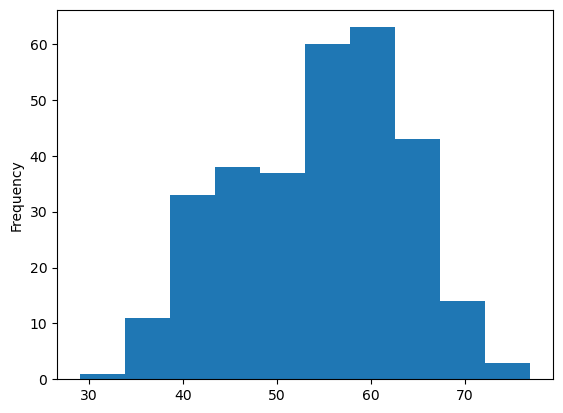

In [ ]:
# Check the Distribution of the age with the histogram
df.age.plot.hist();

Histogram is the best way to check for distribution

In [ ]:
pd.crosstab(df.target,df.cp)

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


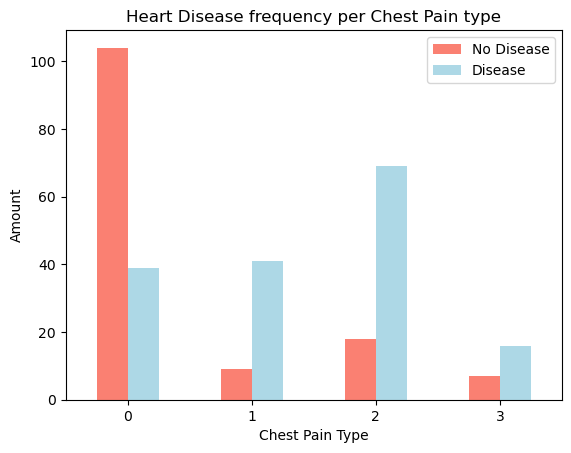

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind='bar',color=['salmon','lightblue'])
plt.title("Heart Disease frequency per Chest Pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

In [ ]:
# Making a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


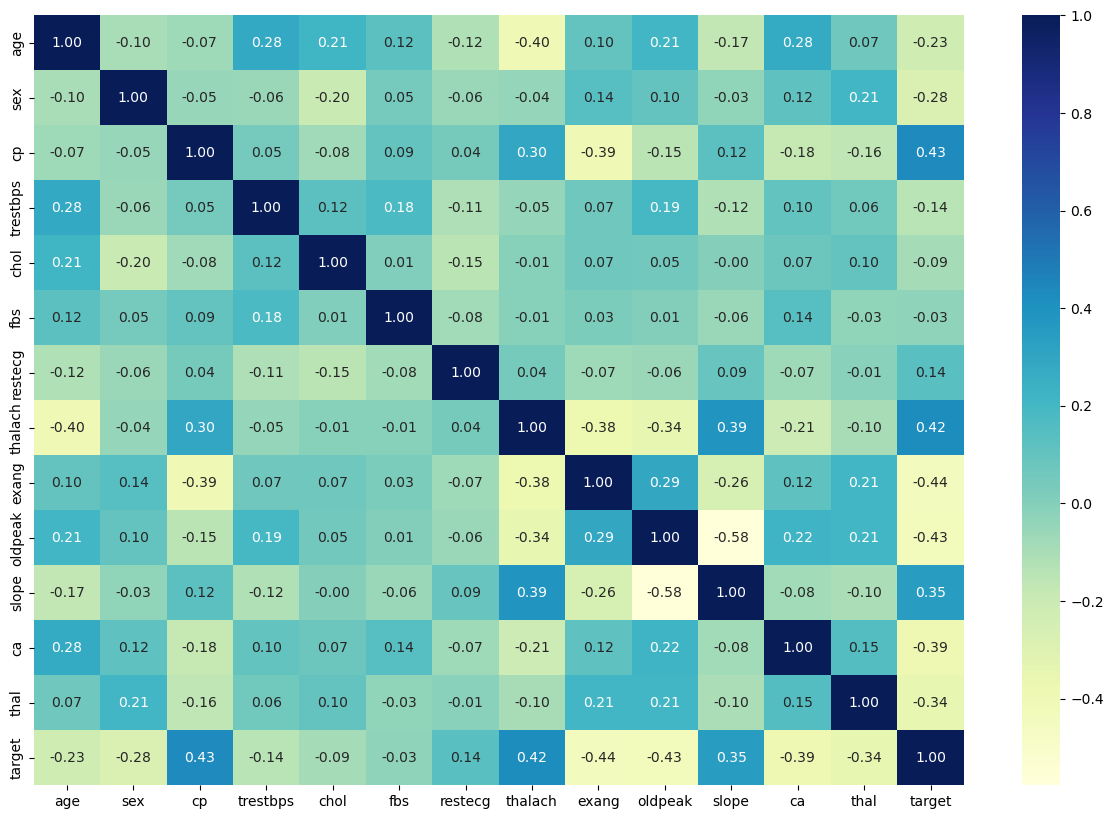

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(df.corr(),
                annot = True,
                fmt='.2f',
                cmap="YlGnBu");

The more the density of colour, the more is positive correlation,
The less the density of colour, or lighter the colour , it shows negative correlation

`cp` and `thalach` shows more positive correlation with target ie the chances patient will have heart disease

whereas `exang` shows a negative correlation, which indicates the patient got less chances of having heart disease if he/she has more exang

EDA Done Here 👌

# Modelling

In [ ]:
# split the data into X and Y
X = df.drop("target",axis = 1)
Y = df['target']


In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
# Split the Data into train and test sets
np.random.seed(2)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3)

In [ ]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3
109,50,0,0,110,254,0,0,159,0,0.0,2,0,2
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2


In [ ]:
ytrain

281    0
226    0
109    1
64     1
14     1
      ..
75     1
22     1
72     1
15     1
168    0
Name: target, Length: 212, dtype: int64

Now we've got our data split into training and test it's time to build our machine learning model and we'll test it (use the patterns) on thr test set

## Choosing the right Model
We are going to try 3 different models

1. `Logistic Regression`
2. `K-Nearest Neighbours Classifiers`
3. `Random Forest Classifier`

In [ ]:
# creating dictionary for models
models = {"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}
# creating a fumction to fit the data and get the score of each models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    '''
    Fits and evaluates given machine learning models

    parameters
    models: a dictionary of different scikit-learn machine learning models
    x_train: training data (no labels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    '''
    np.random.seed(2)
    modelscore = {}
    for name,model in models.items():
        # fit the model to the data
        model.fit(x_train,y_train)
        # evaluate the model and appending the score to modelscore
        modelscore[name] = model.score(x_test,y_test)
    return modelscore





In [ ]:
modelscore = fit_and_score(models=models,
                           x_train=xtrain,
                           x_test=xtest,
                           y_train=ytrain,
                           y_test=ytest)
modelscore

C:\Users\gunda\Desktop\HeartDisease\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8901098901098901,
 'KNN': 0.7142857142857143,
 'Random Forest': 0.8681318681318682}

### Model Comparison

In [ ]:
model_compare= pd.DataFrame(modelscore,index=['Accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
Accuracy,0.89011,0.714286,0.868132


(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

<Figure size 1500x1000 with 0 Axes>

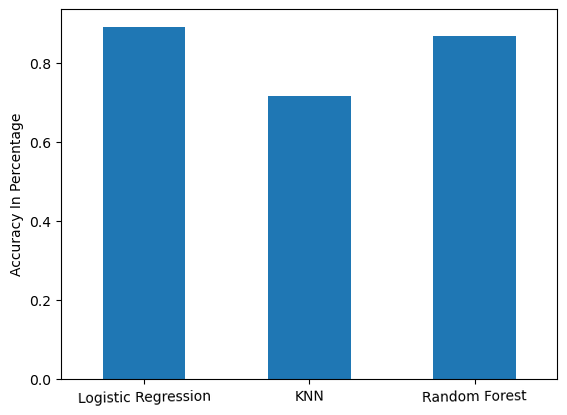

In [ ]:
plt.figure(figsize=(15,10))
model_compare.T.plot(kind='bar',legend=False)

plt.ylabel('Accuracy In Percentage')
plt.xticks(rotation=True)

As the problem is regarding heart disease, this is critical problem, to imply our models in use, we must atleast need `95%` accuracy

Hence to evaluate our model lets look at the following :

* `Hyperparameter Tuning`
* `Feature importance`
* `Confusion Matrix`
* `Cross-Validation`
* `Precision`
* `Recall`
* `F1 score`
* `Classification report`
* `ROC curve`
* `Area Under the Curve(AUC)`

## Hyperparameter tuning

In [ ]:
# lets tune the knn score
train_score = []
test_score = []

neighbors = range(1,31)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(xtrain,ytrain)
    train_score.append(knn.score(xtrain,ytrain))
    test_score.append(knn.score(xtest,ytest))



In [ ]:
train_score

[1.0,
 0.7594339622641509,
 0.7358490566037735,
 0.7169811320754716,
 0.7405660377358491,
 0.7028301886792453,
 0.7358490566037735,
 0.6933962264150944,
 0.6698113207547169,
 0.6792452830188679,
 0.6698113207547169,
 0.660377358490566,
 0.6650943396226415,
 0.6650943396226415,
 0.6509433962264151,
 0.6650943396226415,
 0.6792452830188679,
 0.6886792452830188,
 0.6981132075471698,
 0.6886792452830188,
 0.6839622641509434,
 0.6745283018867925,
 0.6792452830188679,
 0.6698113207547169,
 0.6462264150943396,
 0.6556603773584906,
 0.660377358490566,
 0.6792452830188679,
 0.6792452830188679,
 0.6556603773584906]

In [ ]:
test_score

[0.6703296703296703,
 0.5604395604395604,
 0.7142857142857143,
 0.7032967032967034,
 0.7142857142857143,
 0.7142857142857143,
 0.7362637362637363,
 0.6813186813186813,
 0.6813186813186813,
 0.6813186813186813,
 0.6813186813186813,
 0.7032967032967034,
 0.6813186813186813,
 0.7142857142857143,
 0.7142857142857143,
 0.7362637362637363,
 0.7142857142857143,
 0.6923076923076923,
 0.7252747252747253,
 0.7362637362637363,
 0.7142857142857143,
 0.7252747252747253,
 0.6923076923076923,
 0.7362637362637363,
 0.7032967032967034,
 0.7252747252747253,
 0.7142857142857143,
 0.7252747252747253,
 0.7032967032967034,
 0.6923076923076923]

Maximum KNN score on the test data :73.63%


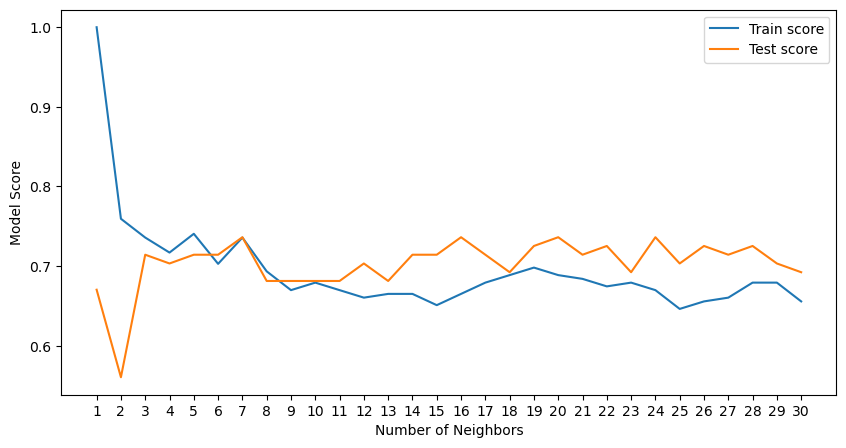

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(neighbors,train_score,label='Train score')
plt.plot(neighbors,test_score,label = 'Test score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()
print(f"Maximum KNN score on the test data :{max(test_score)*100:.2f}%")



We will hence discard the KNN as it  gives vey low accuracy even on hyperparameter tuning

## Hyperparameter tuning with RandomizedSearchCV
 we are going to tune :
 * `Logistic Regression`
 * `Random Forest Classifier`

   
.... using RandomizedSearchCV

In [ ]:
# Create a hyperparameter  grid for logistic Regression
log_reg_grid = {'C': np.logspace(-4,4,50),
               'solver':['liblinear']}

# create a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators':np.arange(10,1000,30),
          'max_depth':[None,3,5,10],
          'min_samples_split':np.arange(2,20,2),
          'min_samples_leaf':np.arange(1,20,2)}

* #### Logistic Regression Tunning

In [ ]:
np.random.seed(2)
# setup the random search hyperparameter
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv = 10,
                               n_iter=50,
                               verbose=True)
# Fit random hyperparameter serach model for Logistic regression
rs_log_reg.fit(xtrain,ytrain)


Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 1.45634848e-04, 2.12095089e-04, 3.08884360e-04,
       4.49843267e-04, 6.55128557e-04, 9.54095476e-04, 1.38949549e-03,
       2.02358965e-03, 2.94705170e-03, 4.29193426e-03, 6.25055193e-03,
       9.10298178e-03, 1.32571137e-02, 1.93069773e-02, 2.81176870e-02,
       4.09491506e-...
       3.72759372e+00, 5.42867544e+00, 7.90604321e+00, 1.15139540e+01,
       1.67683294e+01, 2.44205309e+01, 3.55648031e+01, 5.17947468e+01,
       7.54312006e+01, 1.09854114e+02, 1.59985872e+02, 2.32995181e+02,
       3.39322177e+02, 4.94171336e+02, 7.19685673e+02, 1.04811313e+03,
       1.52641797e+03, 2.22299648e+03, 3.23745754e+03, 4.71486636e+03,
       6.86648845e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.18420699693267145}

In [ ]:
rs_log_reg.score(xtest,ytest)

0.9010989010989011

On tuning parameters of Logistic Regression ,accuracy increased by `2%` more than original untunned logistic regression model

* #### Random Forest Classifier Tuning

In [ ]:
np.random.seed(2)
# Setup random hyperparameter search For Random Forest Classifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 5,
                          n_iter = 50,
                          verbose = True)
rs_rf.fit(xtrain,ytrain)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 850,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_depth': 5}

In [ ]:
rs_rf.score(xtest,ytest)

0.8901098901098901

In [ ]:
modelscore

{'Logistic Regression': 0.8901098901098901,
 'KNN': 0.7142857142857143,
 'Random Forest': 0.8681318681318682}

In [ ]:
rs_log_reg.score(xtest,ytest)

0.9010989010989011

## Hyperparameter tuning with GridSearchCV

Since our Logistic Regression model provides the best scores so far we'll try and improve them again using GridSearchCV....

`Note`: Unlike RandomizedSearchCV there is no 'n_iter' in GridSearchCV as it tries every single combination of parameter and finds the best one

In [ ]:
# Create hyperparameter grid for Logistic Regression Model
log_reg_grid = {'C': np.logspace(-4,4,30),
               'solver':['liblinear']}
# Setup grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(LogisticRegression(),
                               param_grid=log_reg_grid,
                               cv = 15,
                               verbose=True)
# Fit our grid hyperparameter search model
gs_log_reg.fit(xtrain,ytrain)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


GridSearchCV(cv=15, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
gs_log_reg.score(xtest,ytest)

0.9120879120879121

In [ ]:
rs_log_reg.score(xtest,ytest)

0.9010989010989011

## Evaluating our tuned machine learning classifier,beyond accuracy

* `ROC curve and AUC score`
* `Confusion Matrix`
* `Precision`
* `Recall`
* `F1-Score`

... and it will be great if cross-validation was used where possible

To make comparison and evaluate our trained model, first we need to make predictions

In [ ]:
ypreds = gs_log_reg.predict(xtest)

In [ ]:
ypreds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [ ]:
ytest

99     1
296    0
89     1
30     1
234    0
      ..
20     1
28     1
131    1
172    0
71     1
Name: target, Length: 91, dtype: int64

## Evalaution of Model

`ROC` curve is created by plotting the true postive rate against the false positive rate

`Confusion Matrix`

* TRUE POSITIVE: model predicts 1 when truth is 1
* FALSE POSITIVE: model predicts 1 when truth is 0
* TRUE NEGATIVE: model predicts 0 when truth is 0
* FALSE NEGATIVE: model predicts 0 when truth is 1

`AUC` area under curve, perfect model gets auc score '1'


## ROC Curve

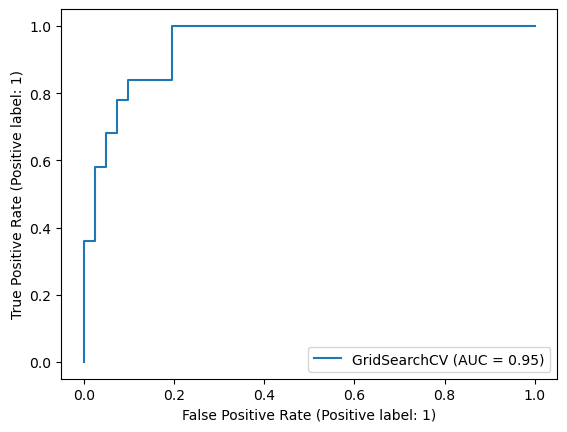

In [ ]:
# plot the ROC curve and calculate AUC metrics
RocCurveDisplay.from_estimator(gs_log_reg,xtest,ytest);

## Confusion Matrix

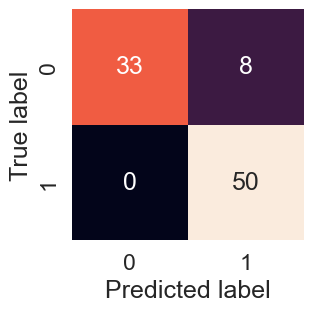

In [ ]:
# coonfusion matrix
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(ytest, ypreds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(ytest, ypreds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis

plot_conf_mat(ytest, ypreds)

Lets get a classification report as well as cross-validated precision, recall and f1 score

In [ ]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        41
           1       0.86      1.00      0.93        50

    accuracy                           0.91        91
   macro avg       0.93      0.90      0.91        91
weighted avg       0.92      0.91      0.91        91



Above classification report is made only on single split of data set i.e ytest and xtest and not on all splits included in RandomSearchCV

### Calculate evaluation metrics using Cross Validation

we are going to calculate accuracy, precision, recall and f1 score of our model using cross validation and to do so we will be using `cross_val_score()`


In [ ]:
# Check the best parameters of our model
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
# create a new classifier with best prameters
clf = LogisticRegression(C=0.05736152510448681,solver='liblinear')

In [ ]:
# Cross validated accuracy

cv_acc = cross_val_score(clf, X, Y, cv=25, scoring="accuracy")
cv_acc

array([0.92307692, 0.84615385, 0.84615385, 0.83333333, 0.83333333,
       0.91666667, 0.75      , 0.91666667, 0.91666667, 1.        ,
       0.91666667, 1.        , 0.75      , 0.83333333, 0.91666667,
       0.83333333, 0.91666667, 0.83333333, 0.91666667, 0.91666667,
       0.58333333, 0.75      , 0.75      , 0.75      , 0.83333333])

In [ ]:
avg_acc_score=np.mean(cv_acc)
avg_acc_score

0.8512820512820513

In [ ]:
# Cross validated precision
cv_precision = cross_val_score(clf, X, Y, cv=25, scoring="precision")
avg_precision_score = np.mean(cv_precision)
avg_precision_score

0.8273015873015873

In [ ]:
# Cross validated recall
cv_recall = cross_val_score(clf, X, Y, cv=25, scoring="recall")
avg_recall_score = np.mean(cv_recall)
avg_recall_score

0.9323809523809524

In [ ]:
# Cross validated f1-score
cv_f1= cross_val_score(clf, X, Y, cv=25, scoring="f1")
avg_f1_score = np.mean(cv_f1)
avg_f1_score

0.8713406593406593

In [ ]:
# Vizualize our cross validated metrics
cv_metrics = pd.DataFrame({"Accuracy": avg_acc_score,
                         "Precision": avg_precision_score,
                         'Recall': avg_recall_score,
                         'F1-Score': avg_f1_score},index=['%'])

In [ ]:
cv_metrics

,Accuracy,Precision,Recall,F1-Score
%,0.851282,0.827302,0.932381,0.871341


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1-Score')])

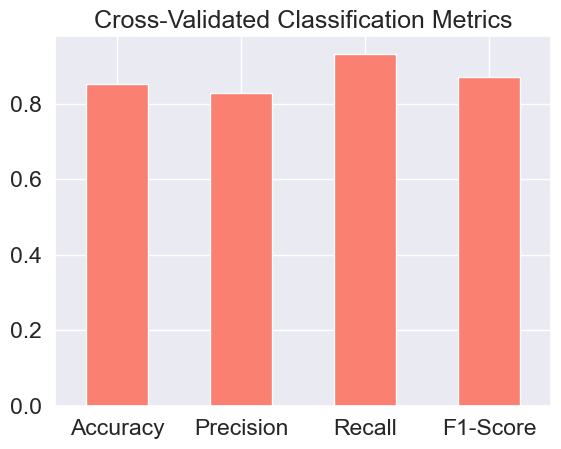

In [ ]:
cv_metrics.T.plot(title= 'Cross-Validated Classification Metrics',kind='bar',legend = False,color='salmon')
plt.xticks(rotation=False)

## Imporatant Features

Which feature contributed most to the outcome of the model and how did they contribute

In [ ]:
gs_log_reg.best_params_

{'C': 0.05736152510448681, 'solver': 'liblinear'}

In [ ]:
# Getting our Model with best parameters
clf= LogisticRegression(C =0.05736152510448681,solver='liblinear' )
clf.fit(xtrain,ytrain)

LogisticRegression(C=0.05736152510448681, solver='liblinear')

In [ ]:
# coef_ is coefficient which gives relationship of contribution of each feature in our data set
clf.coef_

array([[ 0.00729464, -0.42239032,  0.51725634, -0.01394514, -0.0033325 ,
         0.05531538,  0.09776383,  0.02357592, -0.260116  , -0.30280333,
         0.22723264, -0.42413745, -0.41253514]])

In [ ]:
imp_feature = dict(zip(df.columns,list(clf.coef_[0])))
imp_feature

{'age': 0.007294640312334635,
 'sex': -0.42239032004922134,
 'cp': 0.5172563402999636,
 'trestbps': -0.013945141769698032,
 'chol': -0.0033325026259678828,
 'fbs': 0.05531537501548848,
 'restecg': 0.09776382961262091,
 'thalach': 0.023575917458417306,
 'exang': -0.26011600175171723,
 'oldpeak': -0.30280332909269253,
 'slope': 0.22723264335048168,
 'ca': -0.4241374496627244,
 'thal': -0.4125351354993947}

In [ ]:
imp_feature = pd.DataFrame(imp_feature,index=[0])
imp_feature

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.007295,-0.42239,0.517256,-0.013945,-0.003333,0.055315,0.097764,0.023576,-0.260116,-0.302803,0.227233,-0.424137,-0.412535


<Axes: title={'center': 'Features Contribution Graph'}>

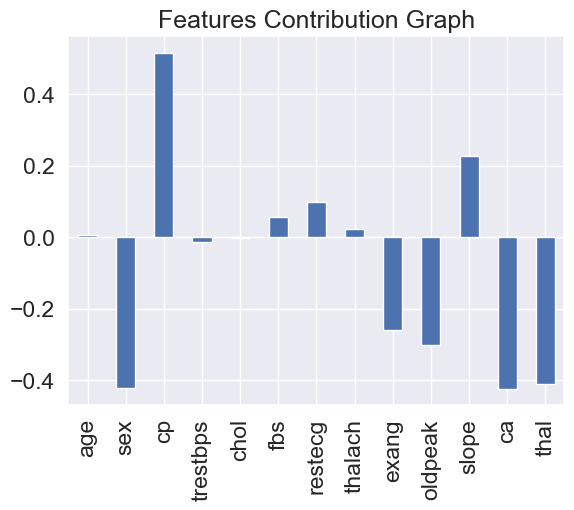

In [ ]:

imp_feature.T.plot(kind='bar',legend=False,title = 'Features Contribution Graph')


## Analyzing the conribution graph

* `Age`, `Trestbps`, `Cholestrol`, `Thalach` do not affect classification hence we can drop them from dataset
* `sex` is inversly proportional i.e as sex increases (from 0 to 1) the target(having disease) increases
* As `slope`(read "Dictionary for Dataset") increases the target increases
* Other features like `ca`, `thal` contribute more to our pattern recognition and classification

In [ ]:
pd.crosstab(df['slope'],df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


In [ ]:
pd.crosstab(df['sex'],df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [ ]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


## Saving Our Trained Model to load later and use on different dataset

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('trainedmodel.pkl','wb'))

In [ ]:
# load the trained model
trained = pickle.load(open('trainedmodel.pkl','rb'))
trained

LogisticRegression(C=0.05736152510448681, solver='liblinear')

In [ ]:
trained.fit(xtrain,ytrain)

LogisticRegression(C=0.05736152510448681, solver='liblinear')

In [ ]:
ytpreds=trained.predict(xtest)
ytpreds

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [ ]:
np.random.seed(41)
xtrain_new,xtest_new,ytrain_new,ytest_new=train_test_split(X,Y,test_size=0.5)

In [ ]:
trained.score(X,Y)

0.8481848184818482

we achieved `84.8%` accuracy

# ////\\\\\\\\ THANK YOU ////\\\\\\\\